# Sales Prediction using Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df=df.dropna()
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<AxesSubplot:>

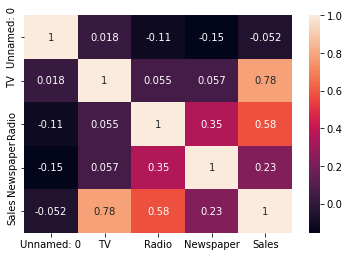

In [11]:
sns.heatmap(df.corr(),annot=True)

# Data Visualisation

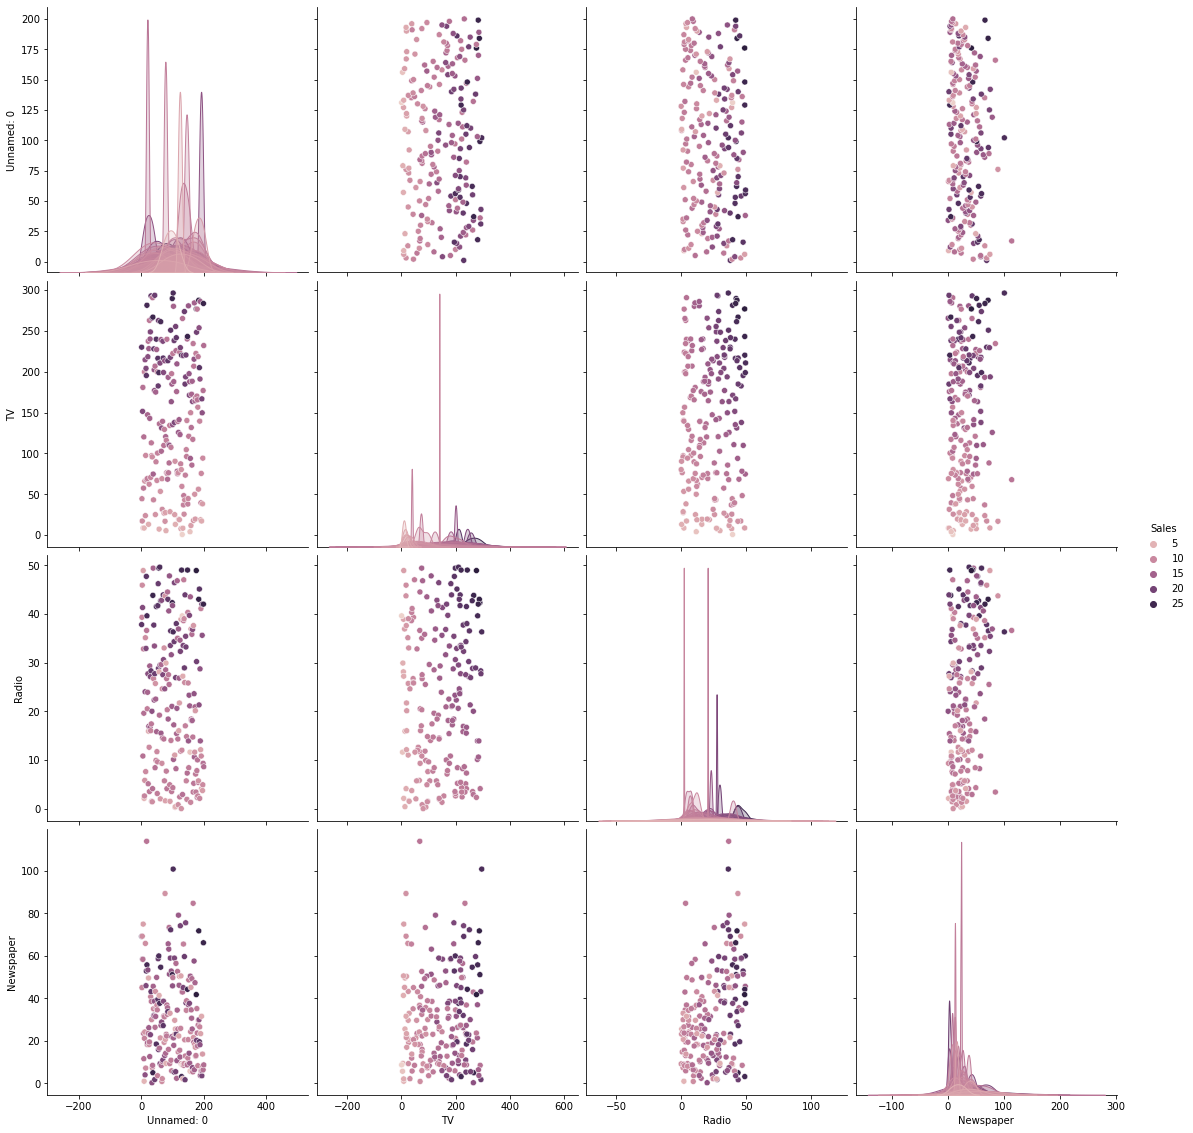

In [12]:
sns.pairplot(df,hue = "Sales", height=4)

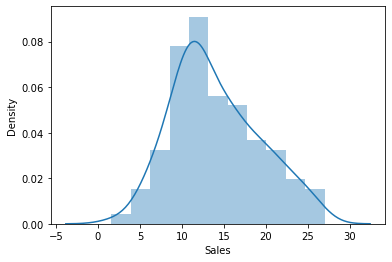

In [13]:
sns.distplot(df["Sales"])
plt.show()

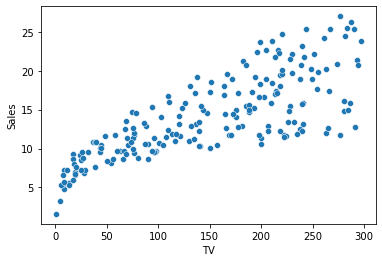

In [14]:
sns.scatterplot(x="TV",y="Sales",data=df)
plt.show()

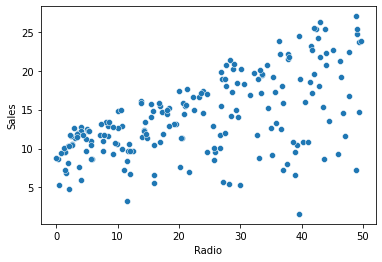

In [15]:
sns.scatterplot(x="Radio",y="Sales",data=df)
plt.show()

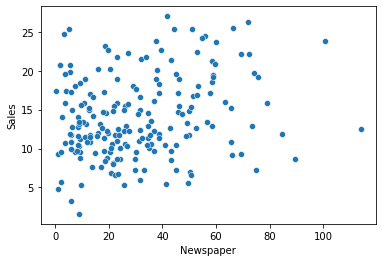

In [16]:
sns.scatterplot(x="Newspaper",y="Sales",data=df)
plt.show()

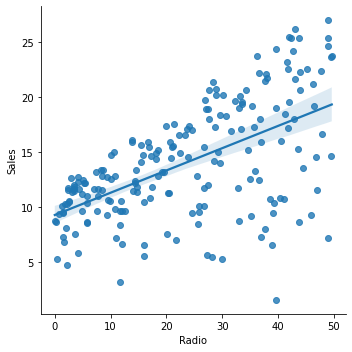

In [17]:
sns.lmplot(data=df,x='Radio',y="Sales")

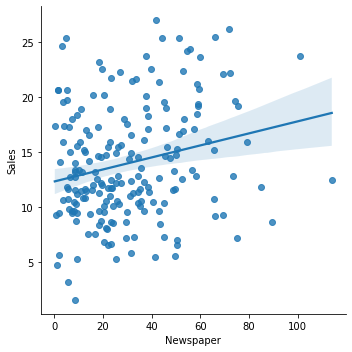

In [18]:
sns.lmplot(data=df,x='Newspaper',y="Sales")

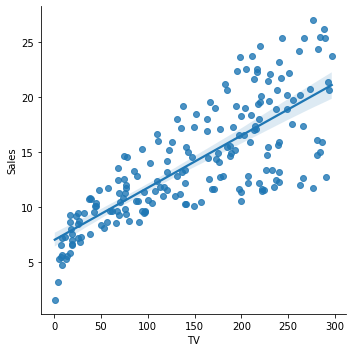

In [19]:
sns.lmplot(data=df,x='TV',y="Sales")

There are No Outliers Present

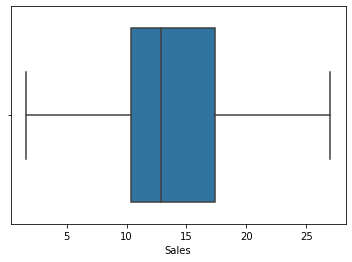

In [20]:
sns.boxplot(x=df["Sales"])
plt.show()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

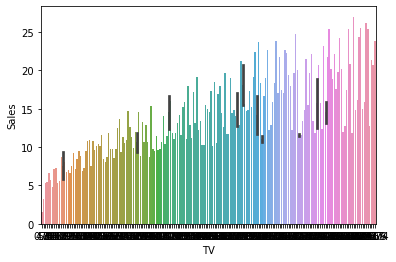

In [21]:
sns.barplot(x='TV',y="Sales",data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

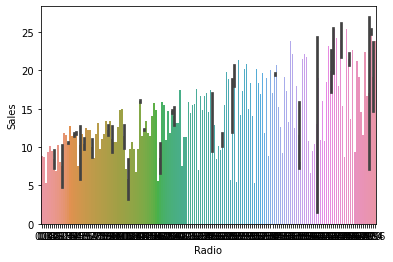

In [22]:
sns.barplot(x="Radio",y="Sales",data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

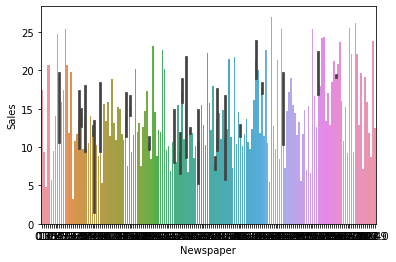

In [23]:
sns.barplot(x="Newspaper",y="Sales",data=df)

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Sales'>

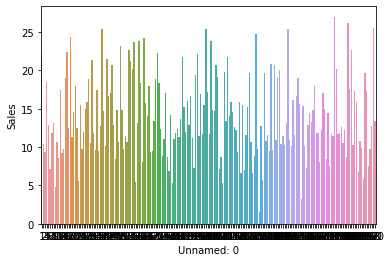

In [24]:
sns.barplot(x="Unnamed: 0",y="Sales",data=df)

# Importing Packages to implement Machine Learning Techniques And For Model Building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65, random_state=0)

In [27]:
model=LinearRegression()

In [28]:
model.fit(x_train,y_train)

y_predict=model.predict(x_test)

In [29]:
print(model.intercept_)
print(model.coef_)

2.8488459814759004
[0.04441066 0.19656498 0.00357552]


In [30]:
act_predict=pd.DataFrame({
    'Actual Value':y_test.values.flatten(),
    'Predicted':y_predict.flatten()
})
act_predict.head(20)

,Actual Value,Predicted
0,11.3,10.017078
1,8.4,7.415322
2,8.7,7.005491
3,25.4,24.212379
4,11.7,12.066605
5,8.7,6.571338
6,7.2,13.115410
7,13.2,14.977876
8,9.2,11.040877
9,16.6,16.255128


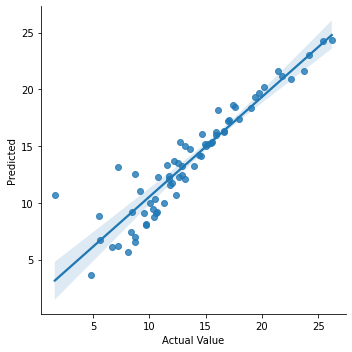

In [31]:
sns.lmplot(data=act_predict,x='Actual Value',y="Predicted")

In [32]:
print("Mean_absolute_error:",mean_absolute_error(y_test,y_predict))
print("Mean_squared_error:",mean_squared_error(y_test,y_predict))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_predict)))
print("r2_score:",r2_score(y_test,y_predict))

Mean_absolute_error: 1.1772969293020838
Mean_squared_error: 3.284847620276579
Squre_Mean_absolute_error: 1.0850331466375043
r2_score: 0.871570930067359


In [33]:
model.score(x_train,y_train)

0.9066509899406292

In [34]:
model.score(x_test,y_test)

0.871570930067359

# Conclusion

Therefore,the Following Sale Values and different statistical Information Related to the Data Set are Predicted using Data Visualisation And Machine Learning techniques